# Tarea 3 - Miguel Rios Tangarife - Modelo B

In [1]:
import glob
import seaborn as sns
import pandas as pd
import matplotlib.image as img
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
import cv2
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix
import numpy as np
from  sklearn.linear_model import LogisticRegression
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import random

In [2]:
desire_size = (90,90)
batch_size = 500
train_ds = tf.keras.utils.image_dataset_from_directory(
  "data/train/",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=desire_size,
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  "data/train/",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=desire_size,
  batch_size=batch_size)

class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 4253 files belonging to 11 classes.
Using 3403 files for training.
Found 4253 files belonging to 11 classes.
Using 850 files for validation.


Debemos validar que si estén las 11 carpetas de train

**Nota**: La carpeta Shepherd's Purse en un inicio no era leida correctamente, esto 
se debe a el apostrofe en **Shepherd's**, una vez retirado el apostrofe si se reconoce.

In [3]:
#Verificamos que estén las 11 clases
print(class_names)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


## Verificar que se cargaron imágenes

Se mostrará una imagen aleatoria por cada una de las 11 clases

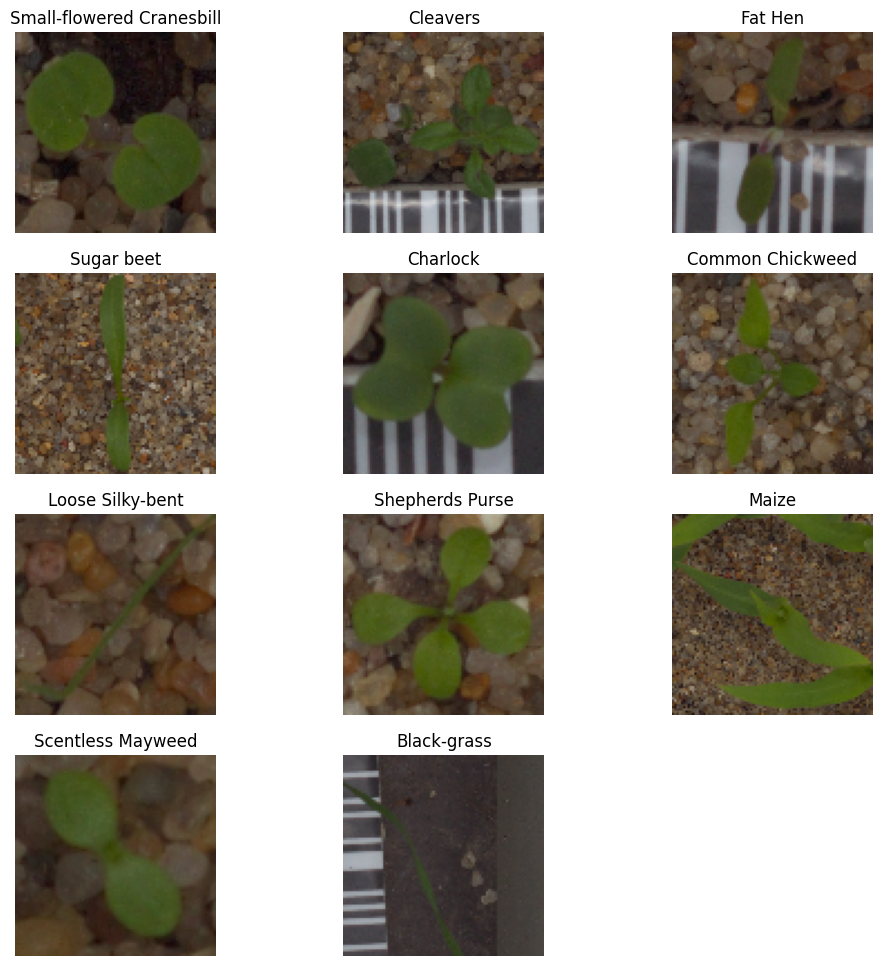

In [6]:
# Crear una figura de matplotlib
plt.figure(figsize=(12, 12))
# Crear una lista para rastrear si ya se ha seleccionado una imagen de cada clase
selected_classes = set()
# Iterar hasta que se haya seleccionado una imagen de cada clase
while len(selected_classes) < len(class_names):
    # Obtener una imagen aleatoria del conjunto de datos
    for images, labels in train_ds:
        index = random.randint(0, images.shape[0] - 1)  # Seleccionar un índice aleatorio
        if labels[index].numpy() not in selected_classes:
            selected_classes.add(labels[index].numpy())  # Registrar la clase como seleccionada
            class_name = class_names[labels[index].numpy()]
            plt.subplot(4, 3, len(selected_classes))  # 4x3 cuadrícula (11 clases)
            plt.imshow(images[index].numpy().astype("uint8"))
            plt.title(class_name)
            plt.axis("off")
        if len(selected_classes) == len(class_names):
            break  # Salir del bucle si se ha seleccionado una imagen de cada clase
# Mostrar la cuadrícula de imágenes
plt.show()

## Arquitectura (CNN) utilizando TensorFlow y Keras

In [7]:
# network using all the channels
model2 = Sequential([
  layers.Rescaling(1./255, input_shape=(desire_size[0], desire_size[1], 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(11)
])
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Usaremos **model.summary()** para ver si está correcto

In [8]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 90, 90, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 90, 90, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 45, 45, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 22, 22, 32)        0

In [9]:
epochs=20
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
7/7 [==============================] - 14s 2s/step - loss: 2.3503 - accuracy: 0.1405 - val_loss: 2.3503 - val_accuracy: 0.1718
Epoch 2/20
7/7 [==============================] - 11s 2s/step - loss: 2.3028 - accuracy: 0.2148 - val_loss: 2.2619 - val_accuracy: 0.2529
Epoch 3/20
7/7 [==============================] - 11s 2s/step - loss: 2.1545 - accuracy: 0.2895 - val_loss: 2.0424 - val_accuracy: 0.3282
Epoch 4/20
7/7 [==============================] - 11s 2s/step - loss: 1.8908 - accuracy: 0.3606 - val_loss: 1.7769 - val_accuracy: 0.3965
Epoch 5/20
7/7 [==============================] - 11s 2s/step - loss: 1.6564 - accuracy: 0.4190 - val_loss: 1.6090 - val_accuracy: 0.4376
Epoch 6/20
7/7 [==============================] - 11s 2s/step - loss: 1.4946 - accuracy: 0.4646 - val_loss: 1.5391 - val_accuracy: 0.4424
Epoch 7/20
7/7 [==============================] - 11s 2s/step - loss: 1.3887 - accuracy: 0.5057 - val_loss: 1.3755 - val_accuracy: 0.4953
Epoch 8/20
7/7 [==================

In [10]:
epochs=10
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
7/7 [==============================] - 11s 2s/step - loss: 0.6296 - accuracy: 0.7925 - val_loss: 0.7629 - val_accuracy: 0.7518
Epoch 2/10
7/7 [==============================] - 11s 2s/step - loss: 0.5872 - accuracy: 0.8031 - val_loss: 0.7338 - val_accuracy: 0.7800
Epoch 3/10
7/7 [==============================] - 11s 2s/step - loss: 0.5852 - accuracy: 0.8037 - val_loss: 0.7267 - val_accuracy: 0.7718
Epoch 4/10
7/7 [==============================] - 11s 2s/step - loss: 0.5669 - accuracy: 0.8049 - val_loss: 0.7423 - val_accuracy: 0.7729
Epoch 5/10
7/7 [==============================] - 11s 2s/step - loss: 0.5359 - accuracy: 0.8181 - val_loss: 0.7251 - val_accuracy: 0.7776
Epoch 6/10
7/7 [==============================] - 11s 2s/step - loss: 0.4881 - accuracy: 0.8381 - val_loss: 0.7404 - val_accuracy: 0.7659
Epoch 7/10
7/7 [==============================] - 11s 2s/step - loss: 0.4687 - accuracy: 0.8466 - val_loss: 0.6814 - val_accuracy: 0.7929
Epoch 8/10
7/7 [==================

In [11]:
epochs=5
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
7/7 [==============================] - 11s 2s/step - loss: 0.4298 - accuracy: 0.8501 - val_loss: 0.8193 - val_accuracy: 0.7565
Epoch 2/5
7/7 [==============================] - 11s 2s/step - loss: 0.4217 - accuracy: 0.8493 - val_loss: 0.7527 - val_accuracy: 0.7706
Epoch 3/5
7/7 [==============================] - 11s 2s/step - loss: 0.3769 - accuracy: 0.8686 - val_loss: 0.6532 - val_accuracy: 0.8071
Epoch 4/5
7/7 [==============================] - 11s 2s/step - loss: 0.3432 - accuracy: 0.8851 - val_loss: 0.6785 - val_accuracy: 0.7988
Epoch 5/5
7/7 [==============================] - 11s 2s/step - loss: 0.3386 - accuracy: 0.8830 - val_loss: 0.6824 - val_accuracy: 0.7953


### Archivo para submit

In [12]:
x_obb_c =[]
file_ob=[]
for file in glob.glob("data\\test\\*"):
    im = Image.open(file)
    imf_resis= im.resize(desire_size)
    x_obb_c.append(np.array(imf_resis))
    file_ob.append(file.split("\\")[2])

In [13]:
y_hat = []
img_array = None
for f in file_ob:
    img= tf.keras.utils.load_img(
        f"data/test/{f}", target_size=desire_size
    )
    img_array= tf.keras.utils.img_to_array(img)
    img_array= tf.expand_dims(img_array, 0)
    predicciones = model2.predict(img_array)
    score = tf.nn.softmax(predicciones[0])
    y_hat.append(score.numpy())

1/1 [==============================] - 0s 18ms/step


In [16]:
df_oob = pd.DataFrame(data= zip(file_ob,[class_names[l] for l in np.argmax(y_hat,axis=1)]),
                        columns=["file","species"])
df_oob.to_csv("data/prediction_modelB333.csv", index=False)

#verificamos que guarde bien
try:
    df_oob.to_csv("data/prediction_modelB444.csv", index=False)
    print("El archivo prediction se ha guardado correctamente en la ruta especificada.")
except Exception as e:
    print("Se produjo un error al intentar guardar el archivo CSV:", str(e))

El archivo prediction_modelB444.csv se ha guardado correctamente en la ruta especificada.
